In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Riddler Express**

_If a baseball team is truly .500, meaning it has a 50 percent chance of winning each game, what’s the probability that it has won two of its last four games and four of its last eight games?_

To do this, we'll simulate many instances of 8 games with 50/50 odds to win any of them. The aggregate probability that a team will accomplish 2-4 and 4-8 is eqivalent to the fractional probability of (times where this does happen / total attempts) 

First, define some functions. 
The first, simulate_games, simulates instances of 8 games and returns a boolean array of length 8 that indicates wins and losses
The second, simulate_instances calls the first for indicated number of instances and returns another boolean array where the passing condition (both 2-4 and 4-8) is true, and otherwise is false.

In [2]:
def simulate_games():
    # create numpy array of size 8 with values 0 and 1 to represent the last 8 games
    return np.random.randint(2, size=8) 

def simulate_instances(nInstances):
    trues = np.zeros(nInstances)
    for i in range(0,nInstances):
        game_results = simulate_games()
        # Check for 2 wins in last four and 4 wins in last 8
        if game_results[:4].sum() == 2 and game_results.sum() == 4:
            trues[i] = 1
    return(trues)

We'll choose the number of simulations we want to run, then call simulate_instances for that many iterations.

The cumulative sum along this array is the number of successful attempts (dentoed truth in code)
We'll also do an analogous cumulative sum of a ones array to indicate how many instances have occured so far.

Dividing those two gives us our answer at each point, the last element being the most accurate, as it represents the most simulated attempts

In [3]:
instances = 100000000 # number of trials
truth_representation_arr = simulate_instances(instances) # array of number of wins
truth_cumsum = truth_representation_arr.cumsum() 
total_cumsum = np.ones(instances).cumsum()
fractional_results = truth_cumsum / total_cumsum

Output final answer 

Being a binary counting variable, I'll use the Agresti–Coull interval (https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval) to estimate the confidence interval

In [4]:
p = fractional_results[-1]
n = instances
z = 1.96 # 95% CI
CI = z * np.sqrt( (p * (1 - p)) / n)

solution = str(round(p,4)) + " ± " + str(round(CI,4))
print("Solution: " + solution)

Solution: 0.1406 ± 0.0001


We'll make a plot of how accurate our solution gets over simulation iterations.

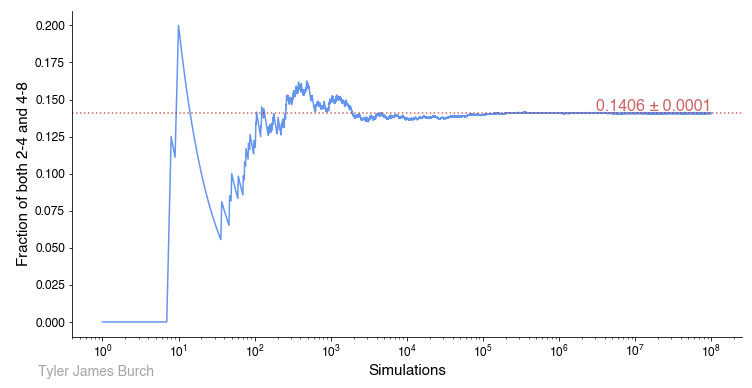

In [6]:
# generate fig
fig = plt.figure(figsize=(12,6))
ax = plt.gca()
ax.set_xscale('log')

# plot probability evolution
plt.plot(total_cumsum, fractional_results,color="cornflowerblue")

# plot solution line
ax.axhline(fractional_results[-1],linestyle=":",color="firebrick",alpha=0.7)

# Make plot better looking
sns.despine()
ax.tick_params(axis='both', which='major', labelsize=12)

# annotate
plt.xlabel("Simulations",fontsize=15)
plt.ylabel("Fraction of both 2-4 and 4-8",fontsize=15)
plt.annotate(solution,
             xy=(instances,fractional_results[-1]), xycoords="data", 
             ha="right", va="bottom", color="firebrick",alpha=0.7, fontsize=16)
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)


plt.savefig("../plots/express_solution.png")